In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import math

In [2]:
file = open("Range test data 14-09-2024/RADIAL NUNS ISLAND.txt")

dat0 = pd.read_csv(file,header=None)

# print(dat.loc[:])

def logmean(x,y):
    px = math.pow(x/10,10)
    py = math.pow(y/10,10)
    pmean = np.mean([px,py])
    # print(pmean)
    return -10 * np.log10(pmean)


def analyzedoc(dat):
    fcmeanrssi = dat.loc[0][1]
    fcmeansnr = dat.loc[0][2]

    gsmeanrssi = dat.loc[1][0]
    gsmeansnr = dat.loc[1][1]

    # print(int(gsmeanrssi))
    for i in range(0,len(dat),2):
        if(dat.loc[i][1] == 0):
            continue
        fcmeanrssi = logmean(dat.loc[i][1],fcmeanrssi)
        
    fcmeansnr = np.mean([dat.loc[i][2] for i in range(0,len(dat),2)])
        
    for i in range(1,len(dat) - 1,2):
        # print(dat.loc[i][0])
        if(dat.loc[i][0] == 0):
            continue
        gsmeanrssi = logmean(float(dat.loc[i][0]),float(gsmeanrssi))
        
    gnmeansnr = np.mean([dat.loc[i][1] for i in range(1,len(dat) - 1,2)])

    return (gsmeanrssi,gsmeansnr),(fcmeanrssi,fcmeansnr)






In [3]:
dat1 = pd.read_csv("Range test data 14-09-2024/RADIAL NUNS ISLAND.txt",header=None)
dat2 = pd.read_csv("Range test data 14-09-2024/RADIAL PARC DU HAVRE 8KM.txt",header=None)
dat3 = pd.read_csv("Range test data 14-09-2024/RADIAL SAINT BRUNO.txt",header=None)
dat4 = pd.read_csv("Range test data 14-09-2024/YAGI NUNS ISLAND.txt",header=None)
dat5 = pd.read_csv("Range test data 14-09-2024/YAGI PARC DU HAVRE 8KM.txt",header=None)
dat6 = pd.read_csv("Range test data 14-09-2024/YAGI SAINT BRUNO 22.36KM.txt",header=None)
alldats = [dat1,dat2,dat3,dat4,dat5,dat6]

# out1 = analyzedoc(dat1)
# out2 = analyzedoc(dat2)
# out3 = analyzedoc(dat3)
# out4 = analyzedoc(dat4)
# out5 = analyzedoc(dat5)
# out6 = analyzedoc(dat6)
outgs = [analyzedoc(item)[0] for item in alldats]
outfc = [analyzedoc(item)[1] for item in alldats]

print("GS radial RSSI",[i[0] for i in outgs[0:3]])
print("GS radial SNR",[i[1] for i in outgs[0:3]])

print("GS yagi RSSI",[i[0] for i in outgs[3:6]])
print("GS yagi SNR",[i[1] for i in outgs[3:6]])

print("FC radial RSSI",[i[0] for i in outfc[0:2]])
print("FC radial SNR",[i[1] for i in outfc[0:2]])

print("FC yagi RSSI",[i[0] for i in outfc[3:5]])
print("FC yagi SNR",[i[1] for i in outfc[3:5]])


GS radial RSSI [-95.22757434257856, -97.68139839219435, -106.09671550855067]
GS radial SNR [11, 0, -2]
GS yagi RSSI [-95.63845880308101, -95.49895612915489, -102.27935065175771]
GS yagi SNR [12, 9, -6]
FC radial RSSI [-95.06724151812801, -97.4516407737903]
FC radial SNR [0.918918918918919, -4.174603174603175]
FC yagi RSSI [-95.24585983699019, -95.13534324130248]
FC yagi SNR [-2.984375, 1.92]


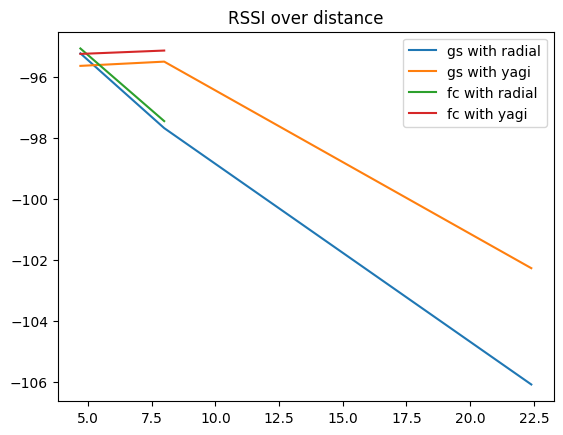

In [4]:
distances = [4.7,7.99,22.4]

plt.title('RSSI over distance')
plt.plot(distances,[i[0] for i in outgs[0:3]],label='gs with radial')
plt.plot(distances,[i[0] for i in outgs[3:6]],label='gs with yagi')
plt.plot(distances[:-1],[i[0] for i in outfc[0:2]],label='fc with radial')
plt.plot(distances[:-1],[i[0] for i in outfc[3:5]],label='fc with yagi')
plt.legend()

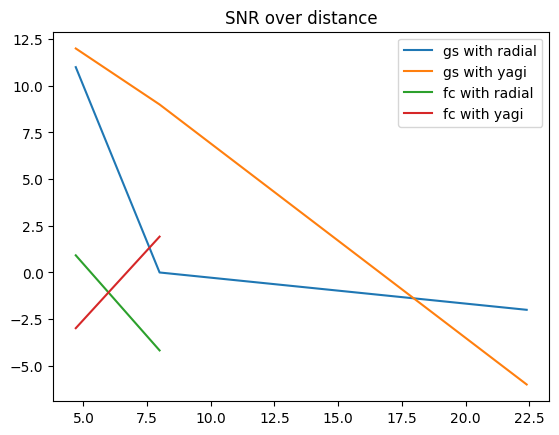

In [5]:
plt.title('SNR over distance')
plt.plot(distances,[i[1] for i in outgs[0:3]],label='gs with radial')
plt.plot(distances,[i[1] for i in outgs[3:6]],label='gs with yagi')
plt.plot(distances[:-1],[i[1] for i in outfc[0:2]],label='fc with radial')
plt.plot(distances[:-1],[i[1] for i in outfc[3:5]],label='fc with yagi')
plt.legend()